In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

# データ可視化
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# 機械学習
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 決定木の可視化
from sklearn import tree
import graphviz

In [2]:
pd.set_option('max_columns', 35)
pd.set_option('max_rows', 600)
sns.set_style("darkgrid")

In [3]:
breastCancer_data = pd.read_csv('data.csv')

In [4]:
breastCancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# ターゲットのユニーク値
breastCancer_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
breastCancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# 欠損値の確認
breastCancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# 欠損データの確認　missing_values_table を作成する
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_precent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_precent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns={0 : 'Missing Values', 1 : '% of total values'})
    return mis_val_table_ren_columns

In [9]:
missing_values_table(breastCancer_data)

,Missing Values,% of total values
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


In [10]:
# 不要な "id", "Unnamed: 32"を削除
breastCancer_data = breastCancer_data.drop(['id', 'Unnamed: 32'], axis=1)

In [11]:
# 目的変数の値を文字列から数値に変換
labelEncoder = LabelEncoder()
breastCancer_data['diagnosis'] = labelEncoder.fit_transform(breastCancer_data['diagnosis'])

In [12]:
# 訓練データ：80% と　テストデータ：20% に分割
breastCancer_train, breastCancer_test = train_test_split(breastCancer_data, test_size=0.2, random_state=42)

# 特徴量と目的変数を分割
breastCancer_train_X = breastCancer_train.iloc[:, 1:]
breastCancer_train_y = breastCancer_train['diagnosis']

breastCancer_test_X = breastCancer_test.iloc[:, 1:]
breastCancer_test_y = breastCancer_test['diagnosis']

In [13]:
breastCancer_train_X.shape, breastCancer_test_X.shape

((455, 30), (114, 30))

C:\Users\owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


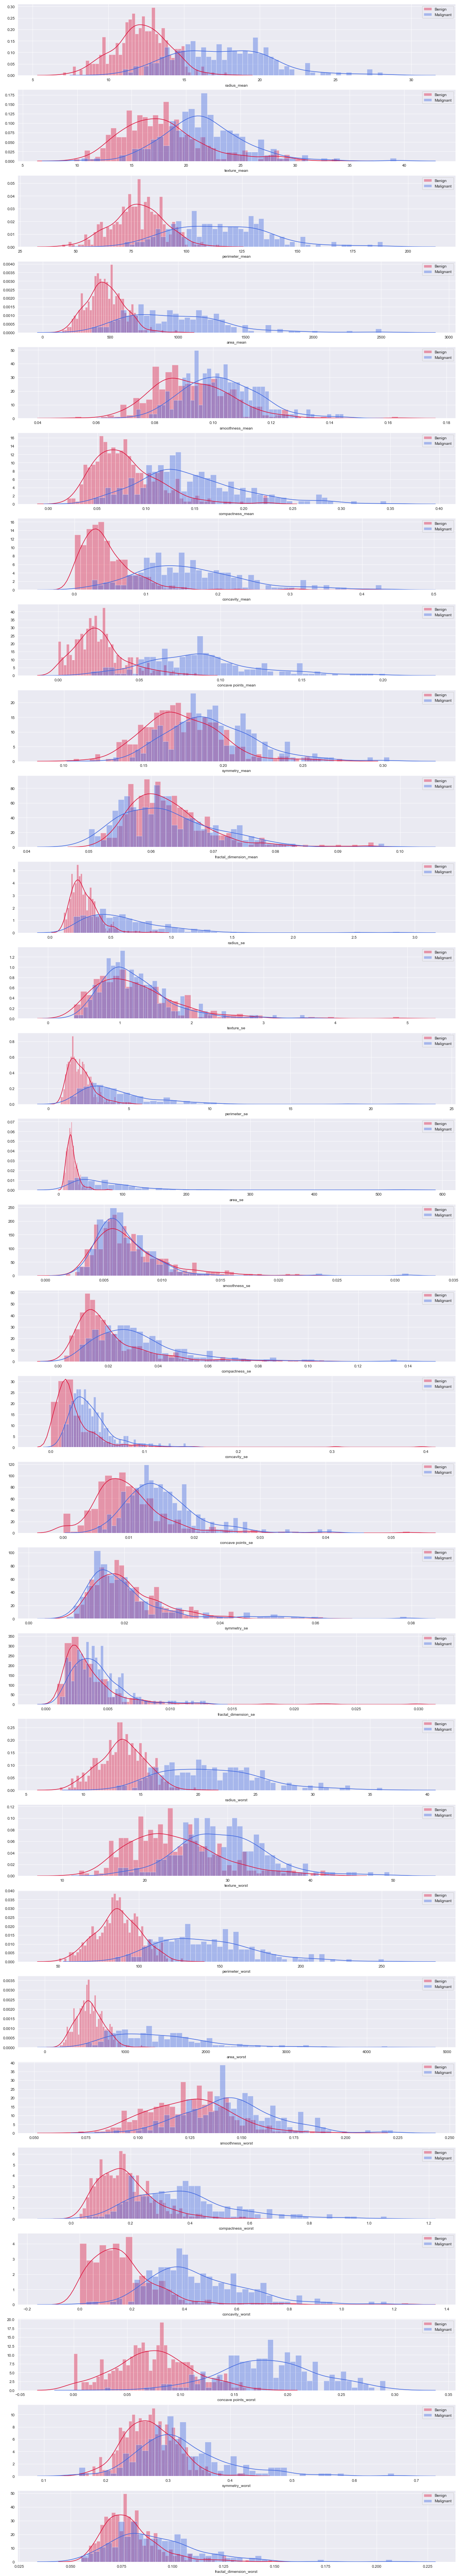

In [14]:
# 特徴量ごとに目的変数の分布を可視化
bc_features = breastCancer_data.iloc[:, 1:].columns

legend = ['Benign', 'Malignant']
plt.figure(figsize=(20, 32 * 4))
gs = gridspec.GridSpec(32, 1)
for i, col in enumerate(breastCancer_data[bc_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(breastCancer_data[col][breastCancer_data.diagnosis == 0], bins=50, color='crimson')
    sns.distplot(breastCancer_data[col][breastCancer_data.diagnosis == 1], bins=50, color='royalblue')
    plt.legend(legend)

In [15]:
# 特徴選択
RF = RandomForestClassifier(n_estimators=250, random_state=42)
RF.fit(breastCancer_train_X, breastCancer_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
# 重要度が高い順にソート
features_col = breastCancer_train_X.columns
importances = RF.feature_importances_

print("重要度が高い特徴量順：")
print(sorted(zip(map(lambda x: round(x, 3), RF.feature_importances_), features_col),
           reverse=True))

重要度が高い特徴量順：
[(0.132, 'concave points_worst'), (0.132, 'area_worst'), (0.126, 'perimeter_worst'), (0.113, 'concave points_mean'), (0.07, 'radius_worst'), (0.055, 'concavity_mean'), (0.051, 'radius_mean'), (0.041, 'concavity_worst'), (0.04, 'perimeter_mean'), (0.04, 'area_mean'), (0.023, 'area_se'), (0.021, 'texture_worst'), (0.017, 'radius_se'), (0.016, 'compactness_worst'), (0.016, 'compactness_mean'), (0.014, 'texture_mean'), (0.013, 'smoothness_worst'), (0.011, 'symmetry_worst'), (0.009, 'smoothness_mean'), (0.009, 'perimeter_se'), (0.009, 'concavity_se'), (0.006, 'fractal_dimension_se'), (0.005, 'symmetry_se'), (0.005, 'fractal_dimension_worst'), (0.005, 'fractal_dimension_mean'), (0.005, 'concave points_se'), (0.005, 'compactness_se'), (0.004, 'texture_se'), (0.004, 'symmetry_mean'), (0.004, 'smoothness_se')]


In [17]:
features_sort = sorted(zip(map(lambda x: round(x, 3), RF.feature_importances_), features_col), reverse=True)

In [18]:
# 率とカラム名に戻す
rate, features_important = list(zip(*features_sort))

In [19]:
features_important

('concave points_worst',
 'area_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'concavity_mean',
 'radius_mean',
 'concavity_worst',
 'perimeter_mean',
 'area_mean',
 'area_se',
 'texture_worst',
 'radius_se',
 'compactness_worst',
 'compactness_mean',
 'texture_mean',
 'smoothness_worst',
 'symmetry_worst',
 'smoothness_mean',
 'perimeter_se',
 'concavity_se',
 'fractal_dimension_se',
 'symmetry_se',
 'fractal_dimension_worst',
 'fractal_dimension_mean',
 'concave points_se',
 'compactness_se',
 'texture_se',
 'symmetry_mean',
 'smoothness_se')

In [21]:
# 上位 5つを取り出し
features_important = features_important[:5]
features_important

('concave points_worst',
 'area_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst')

In [28]:
# 重量度の高いものだけ取り出し
breastCancer_train_X = breastCancer_train_X.loc[:, features_important]
breastCancer_test_X = breastCancer_test_X.loc[:, features_important]

C:\Users\owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


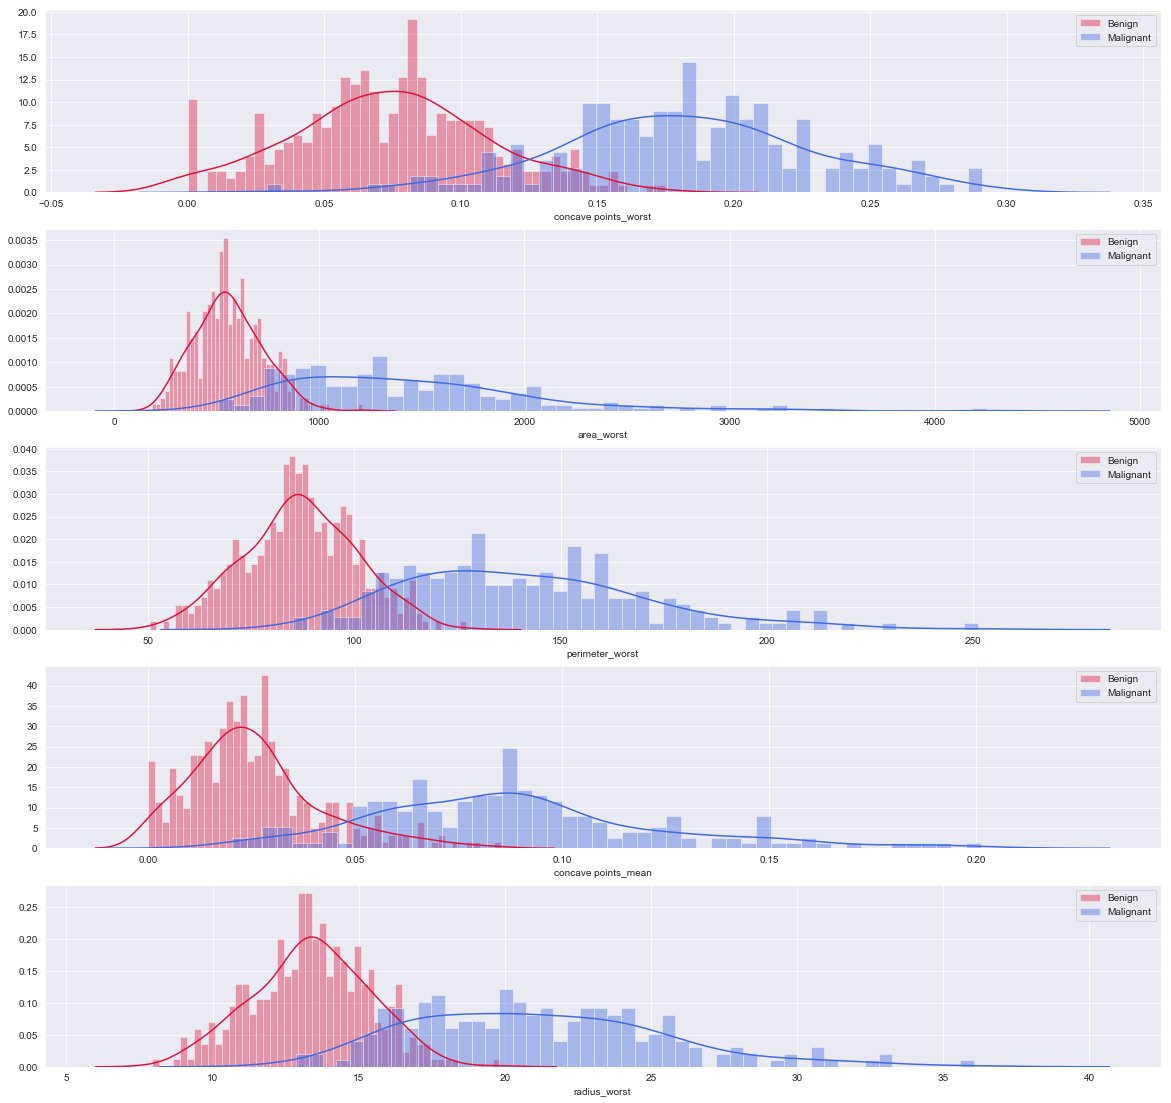

In [31]:
# 特徴量ごとに目的変数の分布を可視化
legend = ['Benign', 'Malignant']
plt.figure(figsize=(20, 32 * 4))
gs = gridspec.GridSpec(32, 1)
for i, col in enumerate(breastCancer_data.loc[:, features_important]):
    ax = plt.subplot(gs[i])
    sns.distplot(breastCancer_data[col][breastCancer_data.diagnosis == 0], bins=50, color='crimson')
    sns.distplot(breastCancer_data[col][breastCancer_data.diagnosis == 1], bins=50, color='royalblue')
    plt.legend(legend)

In [32]:
# Scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [33]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(breastCancer_train_X, breastCancer_train_y)

In [34]:
# 訓練データで予測
y_pred = clf.predict(breastCancer_train_X)

In [35]:
cnf_matrix = confusion_matrix(breastCancer_train_y, y_pred)

In [36]:
cnf_matrix

array([[280,   6],
       [  9, 160]], dtype=int64)

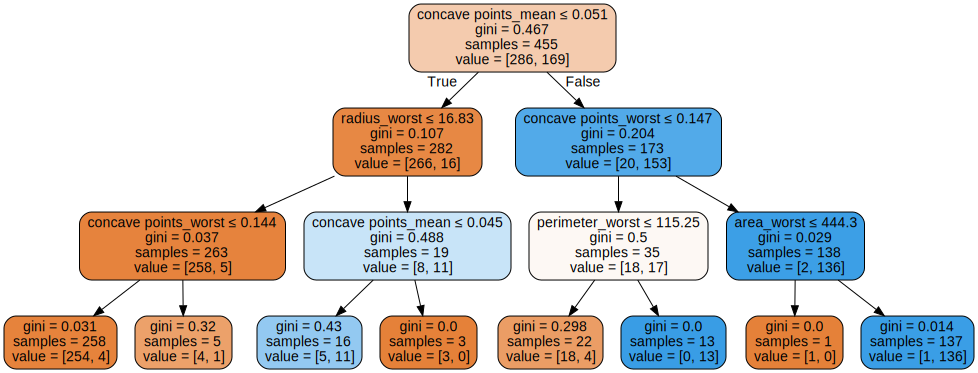

In [37]:
# 決定木の可視化
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=breastCancer_train_X.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [38]:
# テストデータで予測
y_pred_test = clf.predict(breastCancer_test_X)

In [39]:
cnf_matrix_test = confusion_matrix(breastCancer_test_y, y_pred_test)

In [40]:
cnf_matrix_test

array([[69,  2],
       [ 5, 38]], dtype=int64)

In [42]:
# 正解率
accuracy_score(breastCancer_test_y, y_pred_test)

0.9385964912280702

In [43]:
# 適合率
precision_score(breastCancer_test_y, y_pred_test)

0.95

In [44]:
# 再現率
recall_score(breastCancer_test_y, y_pred_test)

0.8837209302325582

In [45]:
# F1値
f1_score(breastCancer_test_y, y_pred_test)

0.9156626506024096

In [46]:
# ランダムフォレストでモデル訓練
RF = RandomForestClassifier(n_estimators=250)
RF = RF.fit(breastCancer_train_X, breastCancer_train_y)

In [47]:
# テストデータで予測
RF_y_pred_test = RF.predict(breastCancer_test_X)

In [48]:
RF_cnf_matrix_test = confusion_matrix(breastCancer_test_y, RF_y_pred_test)

In [49]:
RF_cnf_matrix_test

array([[69,  2],
       [ 3, 40]], dtype=int64)

In [50]:
accuracy_score(breastCancer_test_y, RF_y_pred_test)

0.956140350877193